[- dataset1](#1)

[- dataset2](#2)

[- dataset3](#3)

<a id="home"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler,StandardScaler

## Manipulation de dataset

In [2]:
def load_data(path:str):
    return pd.read_csv(f"data/{path}.csv")

# Dataset 1

<a id="1"></a>

In [3]:
data1 = load_data("Dataset1")

In [4]:
data1.head()

,N,P,K,pH,EC,OC,S,Zn,Fe,Cu,Mn,B,OM,Fertility
0,138,8.6,560,7.46,0.62,0.70,5.9,0.24,0.31,0.77,8.71,0.11,1.2040,0
1,213,7.5,338,7.62,0.75,1.06,25.4,0.30,0.86,1.54,2.89,2.29,1.8232,0
2,163,9.6,718,7.59,0.51,1.11,14.3,0.30,0.86,1.57,2.70,2.03,1.9092,0
3,157,6.8,475,7.64,0.58,0.94,26.0,0.34,0.54,1.53,2.65,1.82,1.6168,0
4,270,9.9,444,7.63,0.40,0.86,11.8,0.25,0.76,1.69,2.43,2.26,1.4792,1


In [5]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 885 entries, 0 to 884
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   N          885 non-null    int64  
 1   P          885 non-null    object 
 2   K          885 non-null    int64  
 3   pH         885 non-null    float64
 4   EC         885 non-null    float64
 5   OC         884 non-null    float64
 6   S          885 non-null    float64
 7   Zn         885 non-null    float64
 8   Fe         885 non-null    float64
 9   Cu         884 non-null    float64
 10  Mn         885 non-null    float64
 11  B          885 non-null    float64
 12  OM         885 non-null    float64
 13  Fertility  885 non-null    int64  
dtypes: float64(10), int64(3), object(1)
memory usage: 96.9+ KB


In [6]:
data1.isnull().sum()

N            0
P            0
K            0
pH           0
EC           0
OC           1
S            0
Zn           0
Fe           0
Cu           1
Mn           0
B            0
OM           0
Fertility    0
dtype: int64

- We don't have much of null values ,so we'll proceed by dropping them
- Also we notice that the column "P" has a dtype "object"

In [7]:
data1["P"].unique()

array(['8.6', '7.5', '9.6', '6.8', '9.9', '7.2', '7', '14.9', '8.1',
       '5.3', '8.3', '7.7', '?', '6.1', '9.4', '5.5', '5', '5.7', '7.9',
       '10.7', '5.9', '4.8', '6.4', '6.6', '4.4', '4.6', '9', '59.2',
       '14.5', '9.2', '78.9', '12.3', '11.2', '12.9', '11.4', '14.3',
       '10.5', '10.3', '12.7', '11.8', '14.7', '13.4', '3.9', '11',
       '11.6', '18.4', '20.4', '19.3', '18.2', '19.5', '20.8', '21.5',
       '21.1', '10.1', '8.8', '2.9', '15.6', '12.5', '13.8', '76.8',
       '103.1', '63.6', '61.4', '70.2', '68', '65.8', '74.6', '81.1',
       '98.7', '85.5', '72.4', '13.2', '12.1', '111.8', '125', '15.1',
       '118.4', '14', '13.6', '15.4', '16', '17.3', '94.3', '92.1',
       '89.9', '96.5', '122.8', '114', '107.5', '83.3', '87.7', '105.3',
       '120.6'], dtype=object)

there is some missing values in "P"

In [8]:
data1["P"]=pd.to_numeric(data1["P"],errors="coerce")

In [9]:
data1.dropna(inplace=True)

In [10]:
data1.describe()

,N,P,K,pH,EC,OC,S,Zn,Fe,Cu,Mn,B,OM,Fertility
count,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000
mean,246.986379,14.554484,501.290579,7.510874,0.544313,0.617753,7.528785,0.468978,4.133893,0.951260,8.671339,0.590079,1.062534,0.589103
std,77.372122,21.955891,129.064561,0.464042,0.141404,0.842548,4.402734,1.893104,3.109214,0.466121,4.299100,0.569059,1.449183,0.575302
min,6.000000,2.900000,11.000000,0.900000,0.100000,0.100000,0.640000,0.070000,0.210000,0.090000,0.110000,0.060000,0.172000,0.000000
25%,201.000000,6.800000,412.000000,7.350000,0.430000,0.380000,4.700000,0.280000,2.050000,0.630000,6.230000,0.270000,0.653600,0.000000
50%,257.000000,8.100000,475.000000,7.500000,0.550000,0.590000,6.640000,0.360000,3.560000,0.930000,8.350000,0.410000,1.014800,1.000000
75%,307.000000,10.700000,581.000000,7.630000,0.640000,0.780000,8.750000,0.470000,6.320000,1.250000,11.480000,0.610000,1.341600,1.000000
max,383.000000,125.000000,1560.000000,11.150000,0.950000,24.000000,31.000000,42.000000,44.000000,3.020000,31.000000,2.820000,41.280000,2.000000


## Analyse des caractéristiques des attributs du dataset :

In [11]:
from math import ceil
def moustache(data,plots_per_row=3,outliers=True,figure_size=(15,10)):
    
    cols=len(data.columns)
    rows= ceil(cols/plots_per_row)
    
    
    
    # fig, axes = plt.subplots(nrows=1, ncols=len(data.columns), figsize=(15, 5))
    fig, axes = plt.subplots(nrows=rows, ncols=plots_per_row, figsize=figure_size)
    
    axes = axes.flatten()
    
    # Create boxplots for each column
    for i, col in enumerate(data.columns):
        if pd.api.types.is_numeric_dtype(data[col]):
          sns.boxplot(x=data[col], ax=axes[i],showfliers=outliers)
        
        # axes[i].set_title(col)
    
    # Adjust layout
    plt.tight_layout()
    plt.show()
    

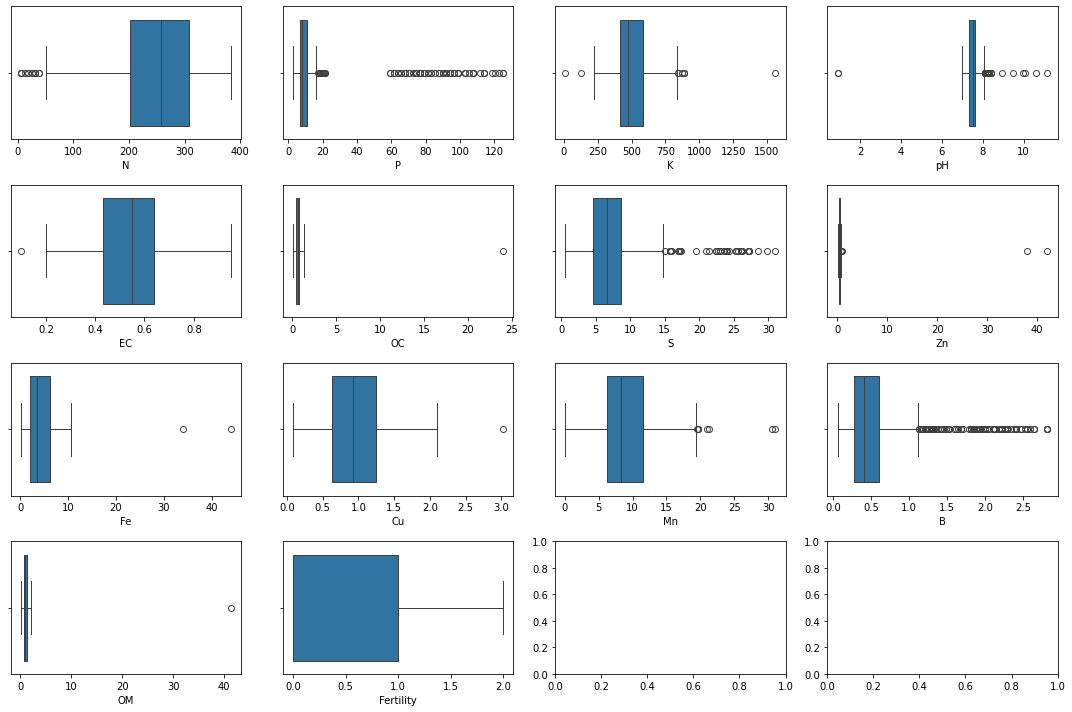

In [12]:
moustache(data1,4,outliers=True)

We can notice that boxplots are meaningful when it comes to continous data ,which is not the case for fertility since it has 3 unique values only. 

In [13]:
data1["Fertility"].unique()

array([0, 1, 2], dtype=int64)

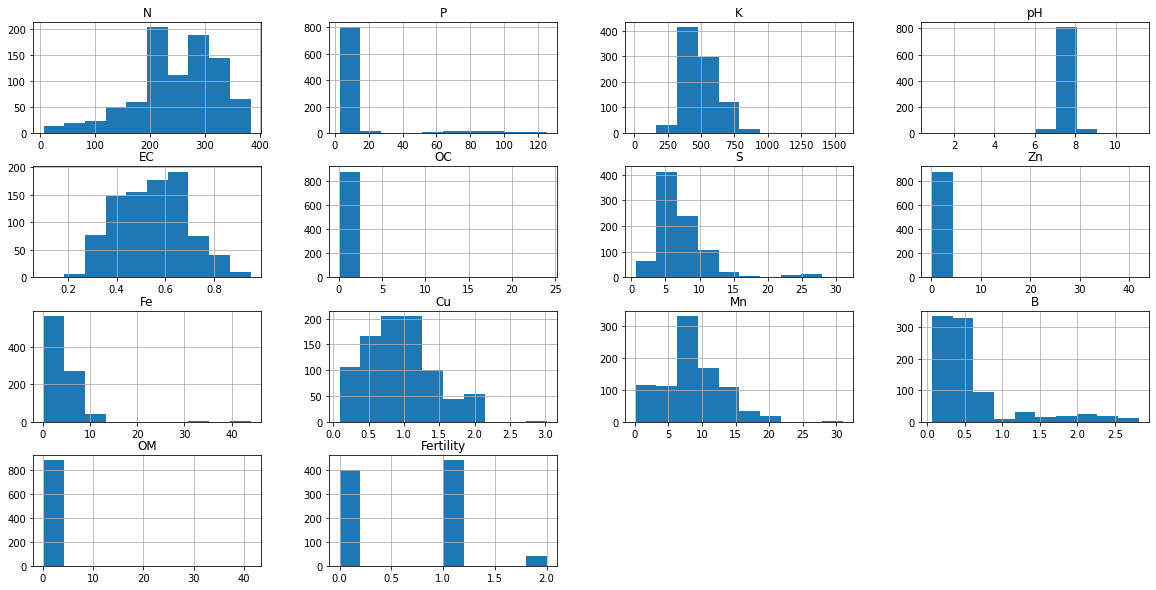

In [14]:
data1.hist(figsize=(20, 10))
plt.show()


Histograms guarentees that we see where how and where most of the data is distributed

In [25]:
def plot_scatter(data,col1:str , col2:str):
    
    """plot pair plot 
    """
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.scatter(data[col1],data[col2])
    plt.show()

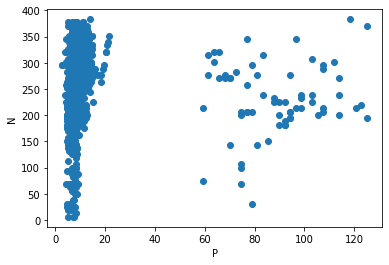

In [30]:
plot_scatter(data1,"P","N")


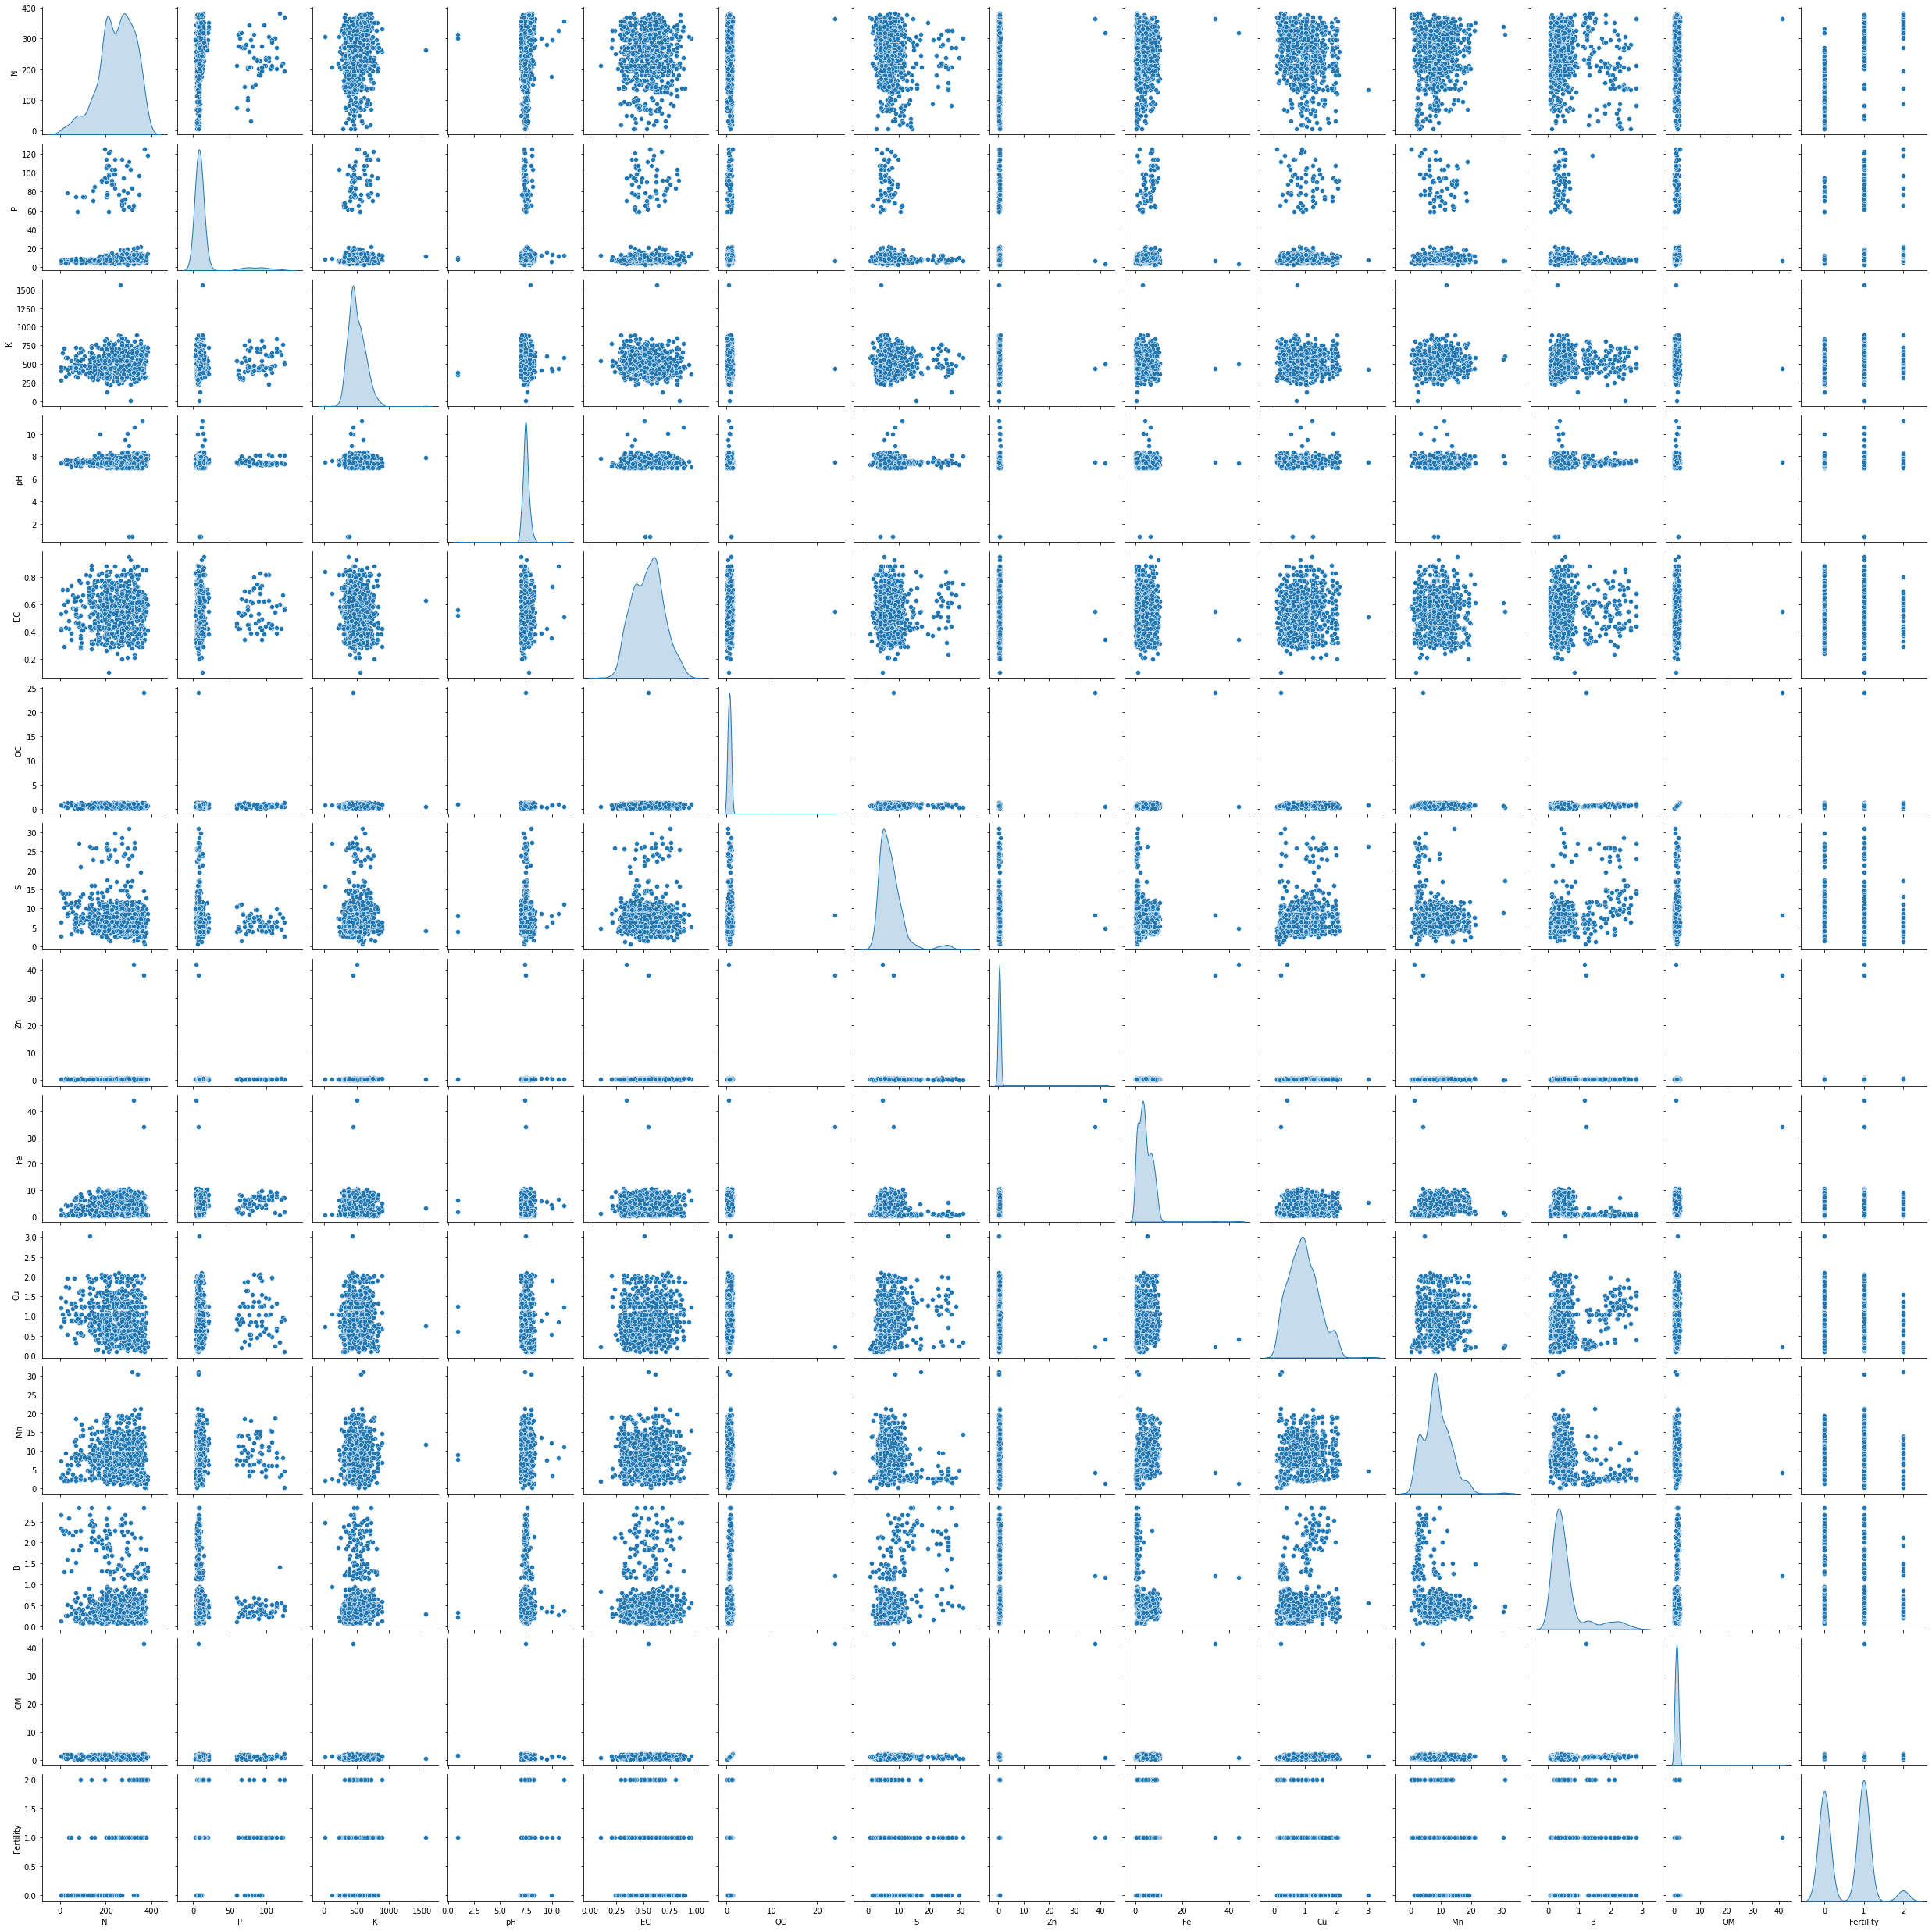

In [16]:
# sns.pairplot(data1,palette='husl', markers=["o", "s", "D"])
# sns.pairplot(data1)
# sns.pairplot(data1, hue='N', palette={'Category_A': 'red', 'Category_B': 'blue'})
# Melt the DataFrame to create a 'variable' column
sns.pairplot(data1, markers=["o"], diag_kind="kde")
plt.show()

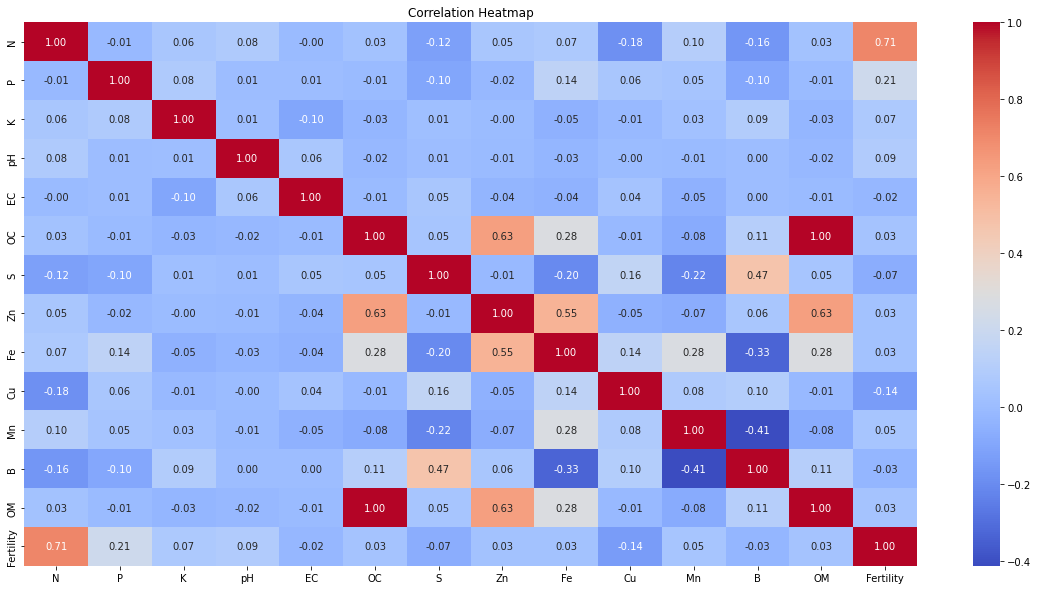

In [31]:

plt.figure(figsize=(20, 10))
sns.heatmap(data1.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')

plt.show()

- Il ya une forte correlation entre **OM** et **OC** (coef = 1.00) .
- On peut aussi dire que **Fertility** et **N** sont fortement corrélé (coef = 0.71) 

For the outliers , we replace all outliers with **NAN** and then we will drop null values
Or we replace with median

In [15]:
def process_outliers(data,rep_med=True):
    
    data_copy = data.copy(deep=True)
    
    if not rep_med:
        med = np.nan
    
    for column in data.columns:
        if pd.api.types.is_numeric_dtype(data[column]):
           Q1 = data_copy[column].quantile(0.25)
           Q3 = data_copy[column].quantile(0.75)
           
           if rep_med:
              med = data_copy[column].median()
           
           IQR = Q3 - Q1
           
           max_threshold = Q3 + (IQR*1.5)
           min_threshold = Q1 - (IQR*1.5)
           
           # data_copy[column] = np.where(((data_copy[column]<= max_threshold)&(data_copy[column]>= min_threshold)),data_copy[column],np.nan)
           data_copy[column] = np.where(((data_copy[column]<= max_threshold)&(data_copy[column]>= min_threshold)),data_copy[column],med)
       
    return data_copy    

In [33]:
data1_no_outliers = process_outliers(data1)

In [34]:
data1_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 881 entries, 0 to 884
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   N          881 non-null    float64
 1   P          881 non-null    float64
 2   K          881 non-null    float64
 3   pH         881 non-null    float64
 4   EC         881 non-null    float64
 5   OC         881 non-null    float64
 6   S          881 non-null    float64
 7   Zn         881 non-null    float64
 8   Fe         881 non-null    float64
 9   Cu         881 non-null    float64
 10  Mn         881 non-null    float64
 11  B          881 non-null    float64
 12  OM         881 non-null    float64
 13  Fertility  881 non-null    float64
dtypes: float64(14)
memory usage: 103.2 KB


### Redondance verticales et horizontales

- forte correlation
- lignes dupliquées

In [35]:
data1_no_outliers.drop_duplicates(inplace=True)

In [36]:
data1_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 878 entries, 0 to 882
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   N          878 non-null    float64
 1   P          878 non-null    float64
 2   K          878 non-null    float64
 3   pH         878 non-null    float64
 4   EC         878 non-null    float64
 5   OC         878 non-null    float64
 6   S          878 non-null    float64
 7   Zn         878 non-null    float64
 8   Fe         878 non-null    float64
 9   Cu         878 non-null    float64
 10  Mn         878 non-null    float64
 11  B          878 non-null    float64
 12  OM         878 non-null    float64
 13  Fertility  878 non-null    float64
dtypes: float64(14)
memory usage: 102.9 KB


In [37]:
data1_no_outliers.drop(columns=["OM","Fertility"],inplace=True)

In [38]:
data1_no_outliers.reset_index(inplace=True)
data1_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   878 non-null    int64  
 1   N       878 non-null    float64
 2   P       878 non-null    float64
 3   K       878 non-null    float64
 4   pH      878 non-null    float64
 5   EC      878 non-null    float64
 6   OC      878 non-null    float64
 7   S       878 non-null    float64
 8   Zn      878 non-null    float64
 9   Fe      878 non-null    float64
 10  Cu      878 non-null    float64
 11  Mn      878 non-null    float64
 12  B       878 non-null    float64
dtypes: float64(12), int64(1)
memory usage: 89.3 KB


Normalization


In [39]:
def normalization(data,method="MinMax"):
    
    """
    data : Dataframe
    
    method : "MinMax" or "Zscore"
    
    return : normalized Dataframe
    """
    if method.lower() == "zscore": 
       scaler = StandardScaler()
    else: 
        scaler = MinMaxScaler()
    
    return pd.DataFrame(scaler.fit_transform(data),columns=data.columns)    
    

In [68]:
def normalization2(data,method="MinMax"):
    
    """
    takes into consideration only the  columns with numerical values 
    
    data : Dataframe
    
    method : "MinMax" or "Zscore"
    
    return : normalized Dataframe
    """
    if method.lower() == "zscore": 
       scaler = StandardScaler()
    else: 
        scaler = MinMaxScaler()
    
    numeric_columns=data.select_dtypes(include=['float64', 'int64']).columns
    
    columns_order = data.columns
    
    # Exclude date columns from normalization

    non_numeric_columns = [col for col in data.columns if col not in numeric_columns]
    
    return    pd.concat([pd.DataFrame(scaler.fit_transform(data[numeric_columns]),columns=data[numeric_columns].columns),
                                  data[non_numeric_columns]], axis=1)[columns_order] 

In [41]:
# data1_no_outliers_minmax = pd.DataFrame(min_max.fit_transform(data1_no_outliers),columns=data1_no_outliers.columns)
# data1_no_outliers_zscore = pd.DataFrame(zscore.fit_transform(data1_no_outliers),columns=data1_no_outliers.columns)
data1_no_outliers_minmax = normalization(data1_no_outliers,method="Minmax")
data1_no_outliers_zscore = normalization(data1_no_outliers,method="zscore")

In [42]:
data1_no_outliers_minmax.describe()

,index,N,P,K,pH,EC,OC,S,Zn,Fe,Cu,Mn,B
count,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000
mean,0.500559,0.601562,0.412170,0.451019,0.480638,0.459453,0.419660,0.431055,0.450891,0.372827,0.427521,0.440375,0.312116
std,0.287755,0.217078,0.178456,0.193427,0.208378,0.187688,0.253790,0.180199,0.174548,0.252668,0.229368,0.211735,0.168029
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.251984,0.453453,0.297710,0.310458,0.357798,0.306667,0.239316,0.286723,0.308824,0.178917,0.268657,0.318584,0.198113
50%,0.500567,0.621622,0.396947,0.413399,0.495413,0.466667,0.418803,0.423729,0.426471,0.323985,0.417910,0.428943,0.320755
75%,0.749150,0.771772,0.465649,0.582108,0.596330,0.586667,0.581197,0.551554,0.573529,0.590426,0.577114,0.585632,0.415094
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [43]:
data1_no_outliers_zscore.describe()

,index,N,P,K,pH,EC,OC,S,Zn,Fe,Cu,Mn,B
count,8.780000e+02,8.780000e+02,8.780000e+02,8.780000e+02,8.780000e+02,8.780000e+02,8.780000e+02,8.780000e+02,8.780000e+02,8.780000e+02,8.780000e+02,8.780000e+02,8.780000e+02
mean,1.294839e-16,1.618548e-16,-3.237097e-16,-1.052056e-16,1.060149e-15,1.375766e-16,-1.213911e-17,-1.456694e-16,-8.902016e-17,-2.427823e-16,7.283468e-17,-1.942258e-16,1.780403e-16
std,1.000570e+00,1.000570e+00,1.000570e+00,1.000570e+00,1.000570e+00,1.000570e+00,1.000570e+00,1.000570e+00,1.000570e+00,1.000570e+00,1.000570e+00,1.000570e+00,1.000570e+00
min,-1.740525e+00,-2.772760e+00,-2.310967e+00,-2.333062e+00,-2.307877e+00,-2.449359e+00,-1.654516e+00,-2.393462e+00,-2.584669e+00,-1.476404e+00,-1.864971e+00,-2.081022e+00,-1.858567e+00
25%,-8.643353e-01,-6.826709e-01,-6.417593e-01,-7.271078e-01,-5.898388e-01,-8.145101e-01,-7.110083e-01,-8.014116e-01,-8.143819e-01,-7.678897e-01,-6.930116e-01,-5.755309e-01,-6.788554e-01
50%,2.694095e-05,9.246160e-02,-8.535667e-02,-1.946072e-01,7.094523e-02,3.845466e-02,-3.377347e-03,-4.067798e-02,-1.399869e-01,-1.934184e-01,-4.192280e-02,-5.402090e-02,5.144201e-02
75%,8.643892e-01,7.845442e-01,2.998452e-01,6.781022e-01,5.555202e-01,6.781782e-01,6.368602e-01,6.690787e-01,7.030069e-01,8.616939e-01,6.525719e-01,6.864249e-01,6.132092e-01
max,1.736636e+00,1.836510e+00,3.295859e+00,2.839801e+00,2.493820e+00,2.881670e+00,2.287999e+00,3.159109e+00,3.147689e+00,2.483618e+00,2.497323e+00,2.644547e+00,4.096166e+00


<a id="2"></a>
# Dataset 2


[home](#home)

In [59]:
data2 = load_data("Dataset2")

In [4]:
data2.head()

,zcta,time_period,population,Start date,end date,case count,test count,positive tests,case rate,test rate,positivity rate
0,95129,32,39741,10/11/2020,10/31/2020,22.0,2543.0,23.0,2.6,304.7,0.9
1,95129,43,39741,5/30/2021,6/19/2021,NaN,3315.0,14.0,1.1,397.2,0.4
2,95129,40,39741,3/28/2021,4/17/2021,34.0,4816.0,37.0,4.1,577.1,0.8
3,95129,55,39741,2/6/2022,2/26/2022,110.0,10194.0,175.0,13.2,1221.5,1.7
4,95129,44,39741,6/20/2021,7/10/2021,14.0,3033.0,17.0,1.7,363.4,0.6


In [46]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337 entries, 0 to 336
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   zcta             337 non-null    int64  
 1   time_period      337 non-null    int64  
 2   population       337 non-null    int64  
 3   Start date       337 non-null    object 
 4   end date         337 non-null    object 
 5   case count       311 non-null    float64
 6   test count       325 non-null    float64
 7   positive tests   310 non-null    float64
 8   case rate        337 non-null    float64
 9   test rate        337 non-null    float64
 10  positivity rate  337 non-null    float64
dtypes: float64(6), int64(3), object(2)
memory usage: 29.1+ KB


In [47]:
data2.describe()

,zcta,time_period,population,case count,test count,positive tests,case rate,test rate,positivity rate
count,337.000000,337.000000,337.000000,311.000000,325.000000,310.000000,337.000000,337.000000,337.000000
mean,94663.596439,43.694362,50260.548961,225.987138,4938.116923,380.196774,19.390504,454.838872,5.827596
std,506.650148,15.222508,17632.827769,401.756273,3672.164742,2027.547426,32.589093,311.005129,9.217758
min,94085.000000,18.000000,23223.000000,0.000000,11.000000,11.000000,0.000000,0.100000,0.000000
25%,94086.000000,31.000000,36975.000000,39.500000,2428.000000,47.250000,3.300000,249.700000,1.300000
50%,95035.000000,43.000000,50477.000000,91.000000,4352.000000,108.500000,8.100000,427.100000,3.000000
75%,95128.000000,56.000000,66256.000000,235.000000,6659.000000,282.000000,19.100000,614.900000,6.600000
max,95129.000000,155.000000,79655.000000,3627.000000,20177.000000,35000.000000,260.700000,1615.100000,100.000000


In [48]:
data2["zcta"].unique()

array([95129, 95128, 95127, 95035, 94087, 94086, 94085], dtype=int64)

In [49]:
data2["time_period"].unique()

array([ 32,  43,  40,  55,  44,  54,  25,  30,  31,  66,  48,  34,  33,
        38,  61,  62,  50,  65,  49,  27,  37,  24,  35,  23,  36,  22,
        21,  19,  42,  60,  39,  29,  41,  58,  45,  67,  52,  28,  47,
        46,  53,  56,  57,  26,  59,  64,  51,  63, 155,  18,  20],
      dtype=int64)

In [50]:
data2.isnull().sum()

zcta                0
time_period         0
population          0
Start date          0
end date            0
case count         26
test count         12
positive tests     27
case rate           0
test rate           0
positivity rate     0
dtype: int64

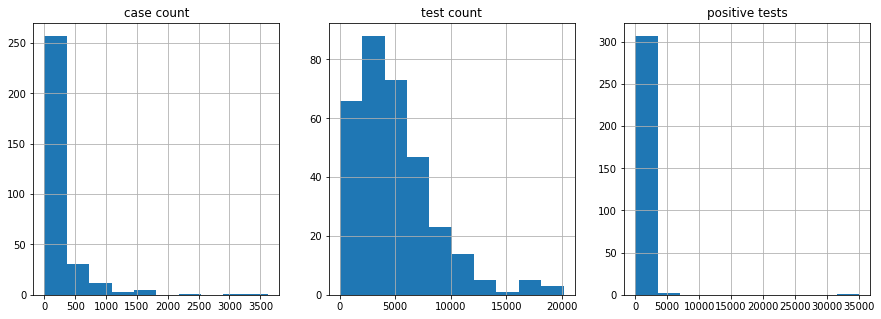

In [60]:

plt.figure(figsize=(15,5))

ax = plt.subplot(1,3,1)
data2["case count"].hist()
ax.set_title("case count")
ax = plt.subplot(1,3,2)
ax.set_title("test count")
data2["test count"].hist()
ax = plt.subplot(1,3,3)
ax.set_title("positive tests")
data2["positive tests"].hist()

plt.show()

We can see that we have null values in  columns above ,also all of them have skewed distributions which means replacing with median or mean is not the best option.
Moreover, dropping more than 30 null values in a dataset of 300 values could lead to a loss of information.

We will try to leverage the use of **KNNs** to replace those values as follows:


In [61]:
from sklearn.impute import KNNImputer

data2_nonull = data2.copy(deep=True)

for col in ["positive tests","case count","test count"]:

# Assuming 'df' is your DataFrame and 'column' is the column with missing values
    imputer = KNNImputer(n_neighbors=3)
    data2_nonull[col] = imputer.fit_transform(data2_nonull[[col]])

In [62]:
data2_nonull.isnull().sum()

zcta               0
time_period        0
population         0
Start date         0
end date           0
case count         0
test count         0
positive tests     0
case rate          0
test rate          0
positivity rate    0
dtype: int64

In [63]:
data2_nonull["Start date"].unique()

array(['10/11/2020', '5/30/2021', '3/28/2021', '2/6/2022', '6/20/2021',
       '1/16/2022', '5/17/2020', '8/30/2020', '9/20/2020', '9/25/2022',
       '9/12/2021', '11/22/2020', '11/1/2020', '2/14/2021', '6/12/2022',
       '7/3/2022', '10/24/2021', '9/4/2022', '10/3/2021', '6/28/2020',
       '1/24/2021', '4/26/2020', '12/13/2020', '4/5/2020', '1/3/2021',
       '3/15/2020', '2/23/2020', '1/12/2020', '5/9/2021', '5/22/2022',
       '3/7/2021', '8/9/2020', '4/18/2021', '4/10/2022', '7/11/2021',
       '10/16/2022', '12/5/2021', '7/19/2020', '8/22/2021', '8/1/2021',
       '12/26/2021', '2/27/2022', '3/20/2022', '6/7/2020', '5/1/2022',
       '8/14/2022', '11/14/2021', '7/24/2022', '12/22/2019', '5-Apr',
       '22-Nov', '11-Oct', '1-Nov', '9-Aug', '26-Apr', '24-Jul', '14-Nov',
       '28-Mar', '12-Jun', '19-Jul', '7-Mar', '4-Sep', '10-Apr', '30-Aug',
       '28-Jun', '17-May', '16-Oct', '15-Mar', '23-Feb', '2-Feb',
       '20-Jun', '20-Sep', '25-Sep', '14-Feb', '1-May', '3-Jul', '7-Jun

extraire la relation entre les annees et les periodes pour standariser toutes les dates

In [64]:
data2_copy = data2_nonull.copy(deep=True)
# data2_copy = data2_nonull.copy(deep=True)

data2_copy["Start date"] =pd.to_datetime(data2_copy["Start date"],errors="coerce",format='%m/%d/%Y', infer_datetime_format=True)

min_periods = data2_copy.groupby(data2_copy["Start date"].dt.year)["time_period"].min()
max_periods = data2_copy.groupby(data2_copy["Start date"].dt.year)["time_period"].max()

periods_to_year = dict()

for year in min_periods.index:
    
    periods_to_year[year] = (min_periods[year],max_periods[year])

periods_to_year


{2019.0: (18, 18), 2020.0: (19, 35), 2021.0: (36, 53), 2022.0: (54, 155)}

In [65]:
# Function to parse dates
def parse_date(row,date_column="Start date"):
    date_str = str(row[date_column])
    time_period = row['time_period']
    month_mapping = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4,
    'may': 5, 'jun': 6, 'jul': 7, 'aug': 8,
    'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
}
    
    if '/' in date_str:
        # Format with month/day/year
        return pd.to_datetime(date_str, format='%m/%d/%Y')
    else:
        # Extract month and day from the format like '5-Apr'
        day_str,month_str = date_str.split('-')
        month = month_mapping[month_str.lower()]
        day = int(day_str)

        # Determine the year based on the time_period
        if 18 == time_period:
            return pd.to_datetime(f'2019-{month:02d}-{day:02d}')
        elif 18 <= time_period <= 35:
            return pd.to_datetime(f'2020-{month:02d}-{day:02d}')
        elif 36 <= time_period <= 53:
            return pd.to_datetime(f'2021-{month:02d}-{day:02d}')
        elif 54 <= time_period <= 155:
            return pd.to_datetime(f'2022-{month:02d}-{day:02d}')
        else:
            # Handle other cases as needed
            return pd.NaT  # Not a Time (missing value)

In [66]:
data2_nonull['Start date'] = data2_nonull.apply(parse_date, axis=1,date_column="Start date")
data2_nonull['end date'] = data2_nonull.apply(parse_date, axis=1,date_column="end date")

Now all the dates have the same format

In [67]:
print(data2_nonull[["Start date","end date"]])


    Start date   end date
0   2020-10-11 2020-10-31
1   2021-05-30 2021-06-19
2   2021-03-28 2021-04-17
3   2022-02-06 2022-02-26
4   2021-06-20 2021-07-10
..         ...        ...
332 2022-05-01 2022-05-21
333 2022-07-24 2022-08-13
334 2022-06-12 2022-07-02
335 2020-06-28 2020-07-18
336 2022-03-20 2022-04-09

[337 rows x 2 columns]


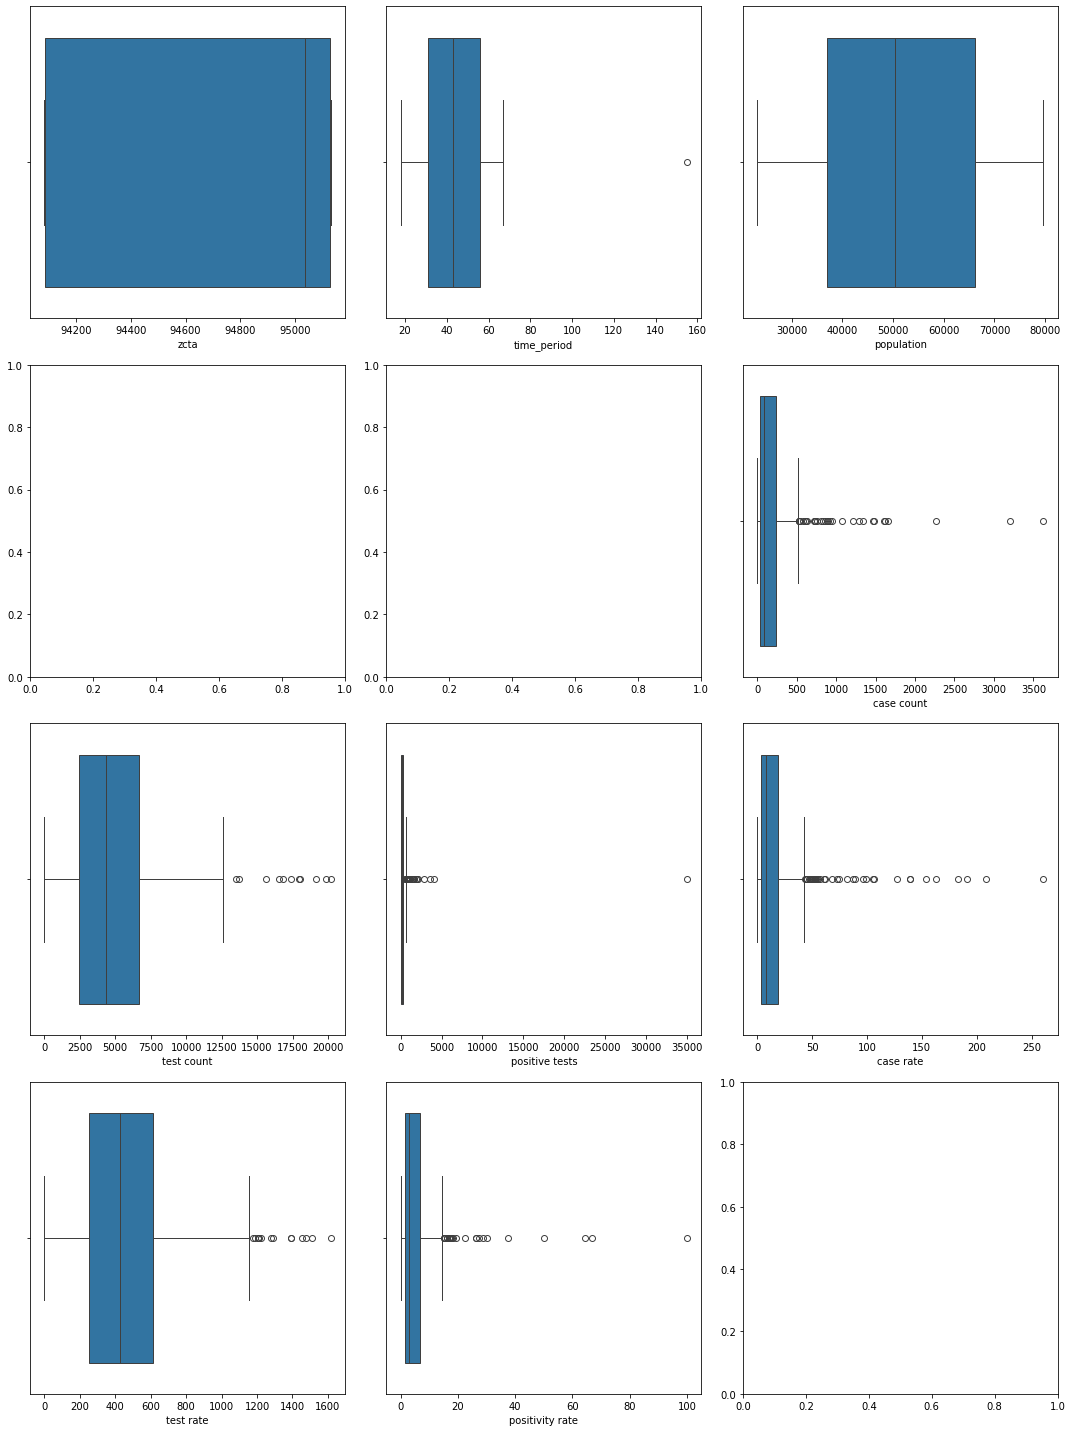

In [60]:
moustache(data2,figure_size=(15,20))

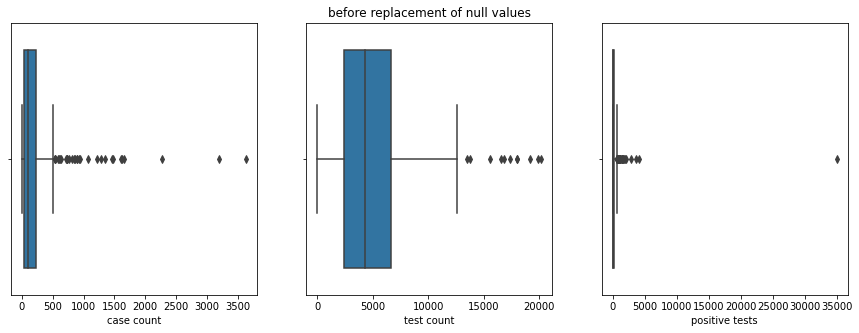

In [68]:

fig = plt.figure(figsize=(15,5))

# fig.title("before replacement of null values")

ax = plt.subplot(1,3,1)
sns.boxplot(x=data2["case count"])
# ax.set_title("case count")
ax = plt.subplot(1,3,2)
plt.title("before replacement of null values")
# ax.set_title("test count")
sns.boxplot(x=data2["test count"])
ax = plt.subplot(1,3,3)
# ax.set_title("positive tests")
sns.boxplot(x=data2["positive tests"])

plt.show()

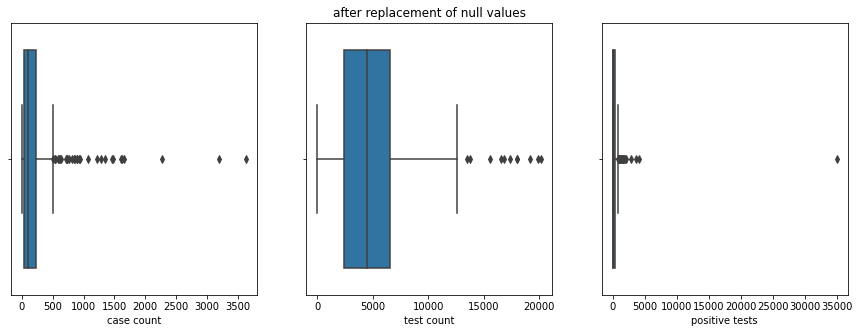

In [69]:
fig = plt.figure(figsize=(15,5))

# fig.title("before replacement of null values")

ax = plt.subplot(1,3,1)
sns.boxplot(x=data2_nonull["case count"])
# ax.set_title("case count")
ax = plt.subplot(1,3,2)
plt.title("after replacement of null values")
# ax.set_title("test count")
sns.boxplot(x=data2_nonull["test count"])
ax = plt.subplot(1,3,3)
# ax.set_title("positive tests")
sns.boxplot(x=data2_nonull["positive tests"])

plt.show()

convert the dtype of ZCTA to object because there is only 7 unique values

In [70]:
data2_nonull['zcta'] = data2_nonull['zcta'].astype(object)

In [71]:

data2_processed = process_outliers(data2_nonull,rep_med=True)


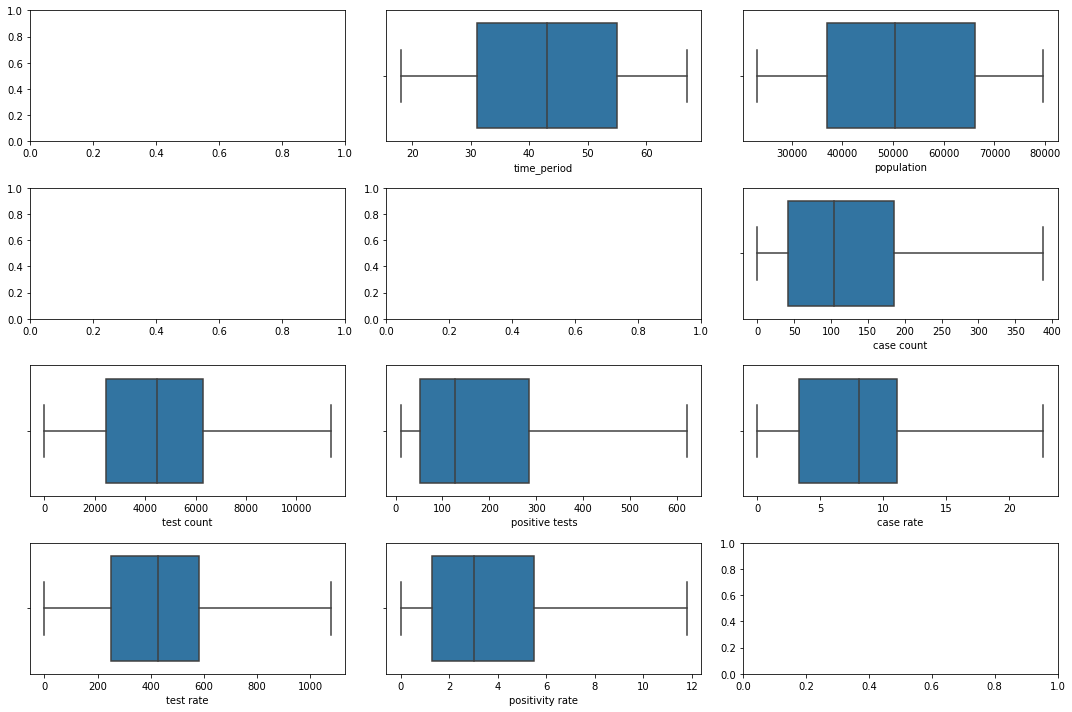

In [72]:
moustache(data2_processed,outliers=False)

## More visualization

La distribution du nombre total des cas confirmés et tests positifs par zones 

In [73]:
import plotly.express as px

# Assuming 'df' is your DataFrame with columns 'zone', 'total_cases', and 'positive_tests'
# fig = px.treemap(data2_processed, path=['zcta'], values='case count', title='Total Cases by Zone')

fig = px.treemap(data2_processed, path=['zcta'], values='case count', color='positive tests',
                 color_continuous_scale='viridis', title='Total and Positive Cases by Zone',
                 hover_data={'case count': ':,.0f', 'positive tests': ':,.0f','zcta':':,.0f'})
# fig = px.treemap(data2_nonull, path=['zcta'], values='case count', color='positive tests',
#                  color_continuous_scale='viridis', title='Total and Positive Cases by Zone',
#                  hover_data={'case count': ':,.0f', 'positive tests': ':,.0f','zcta':':,.0f'})


fig.show()


### Comment les tests COVID 19, les tests positifs et le nombre de cas évolue au fil du temps
(hebdomadaire, mensuel et annuel et pour une zone choisit Indication : Line

In [74]:
data2_processed["zcta"].unique()

array([95129, 95128, 95127, 95035, 94087, 94086, 94085], dtype=object)

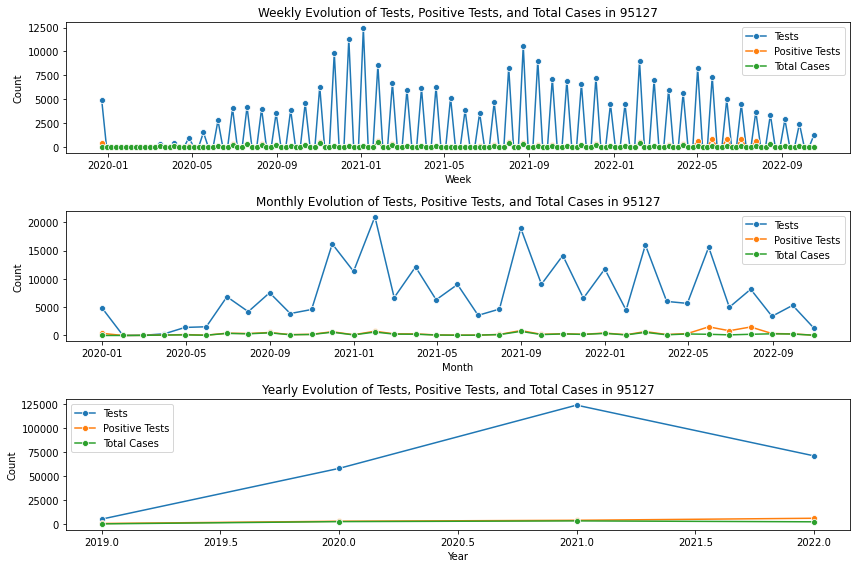

In [75]:


# Choose a specific zone
selected_zone = 95127  # Replace with the actual zone you want to focus on

# Filter DataFrame for the selected zone
df_selected_zone = data2_processed[data2_processed['zcta'] == selected_zone]
# df_selected_zone['Start date'] = pd.to_datetime(df_selected_zone['Start date'])

# Set the 'periode' column as the index for time-based analysis
df_selected_zone.set_index('Start date', inplace=True)

# Resample data for weekly and monthly frequency
df_weekly = df_selected_zone.resample('W-Mon').sum()
df_monthly = df_selected_zone.resample('M').sum()
df_yearly = df_selected_zone.resample('Y').sum()

# print(df_weekly,'here')


# Set up the figure and axes
plt.figure(figsize=(12, 8))

# Line plot for weekly data
plt.subplot(3, 1, 1)
sns.lineplot(x=df_weekly.index, y='test count', data=df_weekly, label='Tests', marker='o')
sns.lineplot(x=df_weekly.index, y='positive tests', data=df_weekly, label='Positive Tests', marker='o')
sns.lineplot(x=df_weekly.index, y='case count', data=df_weekly, label='Total Cases', marker='o')
plt.title(f'Weekly Evolution of Tests, Positive Tests, and Total Cases in {selected_zone}')
plt.xlabel('Week')
plt.ylabel('Count')
plt.legend()

# Line plot for monthly data
plt.subplot(3, 1, 2)
sns.lineplot(x=df_monthly.index, y='test count', data=df_monthly, label='Tests', marker='o')
sns.lineplot(x=df_monthly.index, y='positive tests', data=df_monthly, label='Positive Tests', marker='o')
sns.lineplot(x=df_monthly.index, y='case count', data=df_monthly, label='Total Cases', marker='o')
plt.title(f'Monthly Evolution of Tests, Positive Tests, and Total Cases in {selected_zone}')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend()


plt.subplot(3, 1, 3)
sns.lineplot(x=df_yearly.index.year, y='test count', data=df_yearly, label='Tests', marker='o')
sns.lineplot(x=df_yearly.index.year, y='positive tests', data=df_yearly, label='Positive Tests', marker='o')
sns.lineplot(x=df_yearly.index.year, y='case count', data=df_yearly, label='Total Cases', marker='o')

plt.title(f'Yearly Evolution of Tests, Positive Tests, and Total Cases in {selected_zone}')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()

plt.tight_layout()
plt.show()


Comment les cas covid positifs sont distribués par zone et par année Indication S tacked
Bar chart

<Figure size 864x576 with 0 Axes>

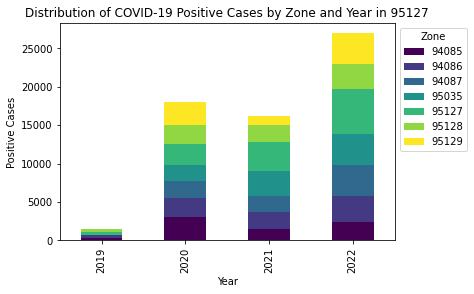

In [76]:

df_selected_zone = data2_processed.copy(deep=True)

# Extract the year from the 'periode' column
df_selected_zone['Start date'] = df_selected_zone['Start date'].dt.year

# Group by zone and year, summing the positive tests
df_grouped = df_selected_zone.groupby(['zcta', 'Start date'])['positive tests'].sum().reset_index()

# Pivot the DataFrame for easier plotting
df_pivot = df_grouped.pivot(index='Start date', columns='zcta', values='positive tests').fillna(0)

# Set up the figure and axes
plt.figure(figsize=(12, 8))

# Stacked bar chart for positive tests by zone and year
df_pivot.plot(kind='bar', stacked=True, colormap='viridis')
plt.title(f'Distribution of COVID-19 Positive Cases by Zone and Year in {selected_zone}')
plt.xlabel('Year')
plt.ylabel('Positive Cases')
plt.legend(title='Zone', loc='upper left', bbox_to_anchor=(1, 1))

plt.show()


Comment peut on efficacement graphiquement représenter le rapport entre la population
et le nombre de tests effectués ?

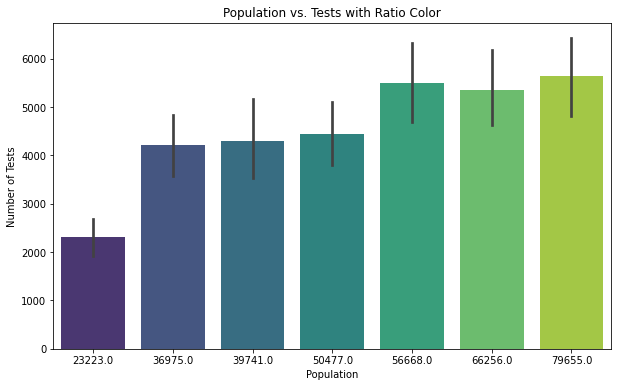

In [77]:


# Suppose 'df' is your DataFrame with columns 'population' and 'tests'
# Add a new column for the ratio
# data2_copy['test_population_ratio'] = data2_copy['test count'] / data2_copy['population']

# Scatter plot
plt.figure(figsize=(10, 6))
# sns.scatterplot(x='population', y='test count', data=data2_copy, hue='test_population_ratio', palette='viridis', size='test_population_ratio', sizes=(20, 200))
sns.barplot(x='population', y='test count', data=data2_processed ,palette='viridis')
plt.title('Population vs. Tests with Ratio Color')
plt.xlabel('Population')
plt.ylabel('Number of Tests')
plt.show()


Quelles sont les 5 zones les plus fortement impactées par le coronavirus ?

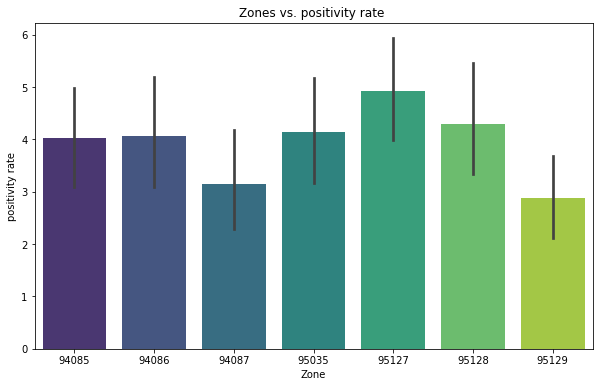

In [78]:
plt.figure(figsize=(10, 6))
# sns.scatterplot(x='population', y='test count', data=data2_copy, hue='test_population_ratio', palette='viridis', size='test_population_ratio', sizes=(20, 200))
# sns.barplot(x='zcta', y='positive tests', data=data2_copy ,palette='viridis')
sns.barplot(x='zcta', y='positivity rate', data=data2_processed ,palette='viridis')
plt.title('Zones vs. positivity rate ')
plt.xlabel('Zone')
plt.ylabel('positivity rate')
plt.show()

Quel est le rapport entre les cas confirmés, les tests effectués et les tests positifs au fil du
temps pour chaque zone ? ( La période doit être choisie)

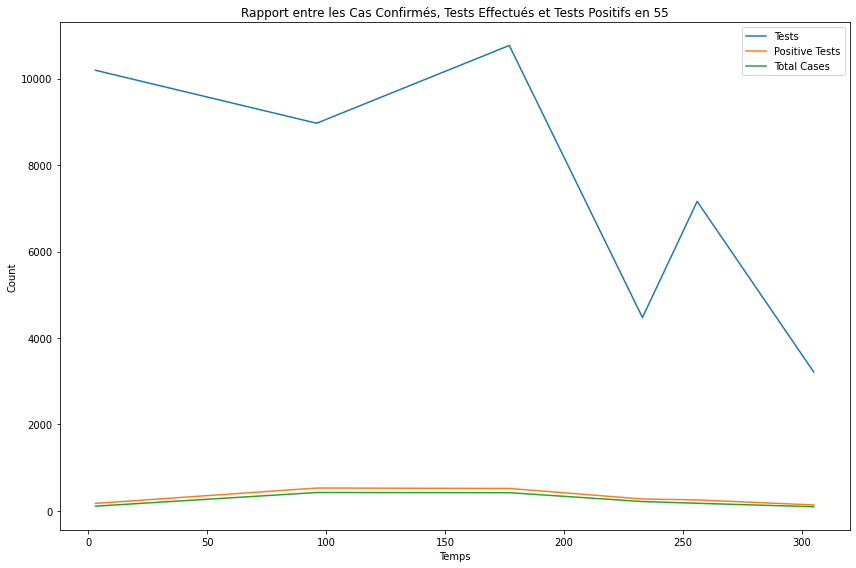

In [88]:

# Suppose 'df' is your DataFrame with columns like 'periode', 'zone', 'tests', 'positive_tests', 'total_cases', etc.
# Replace these columns with the actual columns in your dataset

# Assuming 'periode' is a datetime column, convert it to datetime type if needed
# data2_copy['Start date'] = pd.to_datetime(data2_copy['Start date'], format='%m/%d/%Y', errors='coerce')

# Choose a specific zone
selected_period = '55'  # Replace with the actual value you want to focus on

# Filter DataFrame for the selected period

df_selected_period = data2_processed[data2_processed['time_period'] == int(selected_period)]

# Set the 'periode' column as the index for time-based analysis
# df_selected_period.set_index('Start date', inplace=True)

# Set up the figure and axes
plt.figure(figsize=(12, 8))

# Line plot for the selected period
sns.lineplot(x=df_selected_period.index, y='test count', data=df_selected_period, label='Tests')
sns.lineplot(x=df_selected_period.index, y='positive tests', data=df_selected_period, label='Positive Tests')
sns.lineplot(x=df_selected_period.index, y='case count', data=df_selected_period, label='Total Cases')

plt.title(f'Rapport entre les Cas Confirmés, Tests Effectués et Tests Positifs en {selected_zone}')
plt.xlabel('Temps')
plt.ylabel('Count')
plt.legend()

plt.tight_layout()
plt.show()


# Dataset3
<a id="3"></a>

In [89]:
data3 = load_data("Dataset3")

In [4]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295 entries, 0 to 294
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Temperature  295 non-null    object
 1   Humidity     295 non-null    object
 2   Rainfall     295 non-null    object
 3   Soil         295 non-null    object
 4   Crop         295 non-null    object
 5   Fertilizer   295 non-null    object
dtypes: object(6)
memory usage: 14.0+ KB


In [5]:
data3.head()

,Temperature,Humidity,Rainfall,Soil,Crop,Fertilizer
0,"24,87","82,84","295,61",Clayey,rice,DAP
1,"28,69","96,65","178,96",laterite,Coconut,Good NPK
2,"20,27","81,64","270,44",silty clay,rice,MOP
3,"25,07","95,02","192,9",sandy,Coconut,Urea
4,"25,04","95,9","174,8",coastal,Coconut,Urea


In [6]:
data3.describe()

,Temperature,Humidity,Rainfall,Soil,Crop,Fertilizer
count,295,295,295,295,295,295
unique,173,187,195,7,2,4
top,"23,43","95,02","134,84",silty clay,Coconut,Urea
freq,4,4,3,65,152,101


let's convert **Temperature** , **Humidity**  and  **Rainfall** to numerical values

In [92]:
data3["Temperature"]=data3["Temperature"].str.replace(',', '.').astype(float)
data3["Humidity"]=data3["Humidity"].str.replace(',', '.').astype(float)
data3["Rainfall"]=data3["Rainfall"].str.replace(',', '.').astype(float)

In [8]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295 entries, 0 to 294
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  295 non-null    float64
 1   Humidity     295 non-null    float64
 2   Rainfall     295 non-null    float64
 3   Soil         295 non-null    object 
 4   Crop         295 non-null    object 
 5   Fertilizer   295 non-null    object 
dtypes: float64(3), object(3)
memory usage: 14.0+ KB


Discretisation

In [93]:
def equal_width(data,column):
    
        k = round(1 + (10/3) * np.log10(len(data)))

        min_value = data[column].min()
        max_value = data[column].max()
        interval_width = (max_value - min_value) / k

        
        cuts = [min_value + i * interval_width for i in range(1, k)]

        
        labels = [f'cat{i}' for i in range(1, k + 1)]

        data[column+"_cat"] = pd.cut(data[column], bins=[min_value] + cuts + [max_value], labels=labels, include_lowest=True)
        
        # means = data.groupby(column+"_cat").mean()[column]
        #Mean
        data[column] = data.groupby(column+"_cat")[column].transform('mean')
       
        

        return data

In [94]:
data_disc_width = equal_width(data3.copy(deep=True),"Temperature")

In [7]:
data_disc_width.head()

,Temperature,Humidity,Rainfall,Soil,Crop,Fertilizer,Temperature_cat
0,24.957179,82.84,295.61,Clayey,rice,DAP,cat5
1,28.285714,96.65,178.96,laterite,Coconut,Good NPK,cat8
2,20.553500,81.64,270.44,silty clay,rice,MOP,cat1
3,24.957179,95.02,192.90,sandy,Coconut,Urea,cat5
4,24.957179,95.90,174.80,coastal,Coconut,Urea,cat5


In [95]:
def equal_freq(data, column):

    k = round(1 + (10/3) * np.log10(len(data)))

    labels = [f'cat{i}' for i in range(1, k + 1)]
    data[column+"_cat"], _ = pd.qcut(data[column], q=k, labels=labels, retbins=True)

    data[column] = data.groupby(column+"_cat")[column].transform('mean')

    return data


In [96]:
data_disc_freq = equal_freq(data3.copy(deep=True),"Temperature")
data_disc_freq = equal_freq(data_disc_freq.copy(deep=True),"Humidity")
data_disc_freq = equal_freq(data_disc_freq.copy(deep=True),"Rainfall")

In [36]:
data_disc_freq.head()

,Temperature,Humidity,Rainfall,Soil,Crop,Fertilizer,Temperature_cat,Humidity_cat,Rainfall_cat
0,24.103939,82.649706,282.328438,Clayey,rice,DAP,cat3,cat3,cat9
1,28.163824,95.858710,178.542121,laterite,Coconut,Good NPK,cat8,cat8,cat3
2,20.955758,81.538750,282.328438,silty clay,rice,MOP,cat1,cat2,cat9
3,25.200606,94.337353,191.575938,sandy,Coconut,Urea,cat4,cat7,cat4
4,25.200606,95.858710,178.542121,coastal,Coconut,Urea,cat4,cat8,cat3


Extraction des motifs en utilisant **APRIORI**

In [97]:
data_disc_freq["Temperature"]=data_disc_freq["Temperature"].astype("str")#for compatibility purposes later
data_disc_freq["Humidity"]=data_disc_freq["Humidity"].astype("str")#for compatibility purposes later
data_disc_freq["Rainfall"]=data_disc_freq["Rainfall"].astype("str")#for compatibility purposes later

In [98]:
data_grouped3 = data_disc_freq.groupby("Temperature_cat").agg({'Fertilizer': list, 'Crop': list, 'Soil': list,
                                                              'Temperature': list,'Humidity':list,'Rainfall':list}).reset_index()


In [99]:
data_grouped3


,Temperature_cat,Fertilizer,Crop,Soil,Temperature,Humidity,Rainfall
0,cat1,"[MOP, Urea, DAP, Urea, MOP, Urea, MOP, MOP, Ur...","[rice, rice, rice, Coconut, rice, rice, rice, ...","[silty clay, clay loam, Clayey, sandy, Clayey,...","[20.955757575757573, 20.955757575757573, 20.95...","[81.53875000000001, 87.48151515151515, 80.4129...","[282.3284375, 228.2515625, 282.3284375, 191.57..."
1,cat2,"[Urea, DAP, DAP, DAP, DAP, DAP, Urea, DAP, DAP...","[rice, rice, rice, rice, rice, rice, rice, ric...","[silty clay, silty clay, Clayey, silty clay, s...","[22.77909090909091, 22.77909090909091, 22.7790...","[80.41294117647058, 81.53875000000001, 82.6497...","[228.2515625, 228.2515625, 253.8287878787879, ..."
2,cat3,"[DAP, DAP, DAP, DAP, Urea, MOP, Urea, Urea, DA...","[rice, rice, rice, rice, rice, rice, Coconut, ...","[Clayey, clay loam, silty clay, silty clay, si...","[24.103939393939395, 24.103939393939395, 24.10...","[82.64970588235295, 81.53875000000001, 80.4129...","[282.3284375, 228.2515625, 228.2515625, 228.25..."
3,cat4,"[Urea, Urea, Urea, Urea, Urea, Urea, DAP, DAP,...","[Coconut, Coconut, Coconut, Coconut, rice, Coc...","[sandy, coastal, coastal, sandy, silty clay, l...","[25.20060606060606, 25.20060606060606, 25.2006...","[94.33735294117646, 95.85870967741936, 95.8587...","[191.5759375, 178.54212121212123, 156.925625, ..."
4,cat5,"[Urea, Urea, Good NPK, Good NPK, DAP, Urea, Go...","[Coconut, rice, Coconut, rice, rice, Coconut, ...","[alluvial, Clayey, coastal, clay loam, Clayey,...","[25.8309375, 25.8309375, 25.8309375, 25.830937...","[94.33735294117646, 81.53875000000001, 94.3373...","[178.54212121212123, 253.8287878787879, 156.92..."
5,cat6,"[DAP, DAP, Urea, MOP, MOP, DAP, Urea, DAP, Ure...","[rice, Coconut, Coconut, rice, rice, rice, ric...","[Clayey, laterite, coastal, clay loam, Clayey,...","[26.458529411764708, 26.458529411764708, 26.45...","[80.41294117647058, 98.35454545454544, 87.4815...","[253.8287878787879, 216.5309090909091, 178.542..."
6,cat7,"[Good NPK, DAP, Urea, Urea, Good NPK, DAP, Ure...","[Coconut, Coconut, Coconut, rice, Coconut, Coc...","[sandy, laterite, alluvial, clay loam, laterit...","[27.07935483870968, 27.07935483870968, 27.0793...","[94.33735294117646, 95.85870967741936, 98.3545...","[156.925625, 203.49088235294116, 178.542121212..."
7,cat8,"[Good NPK, Urea, Urea, Good NPK, Good NPK, Ure...","[Coconut, Coconut, Coconut, Coconut, Coconut, ...","[laterite, laterite, alluvial, sandy, sandy, c...","[28.163823529411765, 28.163823529411765, 28.16...","[95.85870967741936, 87.48151515151515, 92.2042...","[178.54212121212123, 178.54212121212123, 156.9..."
8,cat9,"[DAP, Urea, MOP, Urea, Good NPK, Urea, Good NP...","[Coconut, Coconut, Coconut, Coconut, rice, Coc...","[alluvial, coastal, alluvial, alluvial, clay l...","[29.234375, 29.234375, 29.234375, 29.234375, 2...","[95.85870967741936, 98.35454545454544, 95.8587...","[216.5309090909091, 216.5309090909091, 216.530..."


generer les transactions

In [100]:
transactions_data3 = []

for row in data_grouped3.index:
    transactions_data3.extend(list(zip(*data_grouped3.iloc[row,1:])))
       
transactions_data3[:]       

[('MOP',
  'rice',
  'silty clay',
  '20.955757575757573',
  '81.53875000000001',
  '282.3284375'),
 ('Urea',
  'rice',
  'clay loam',
  '20.955757575757573',
  '87.48151515151515',
  '228.2515625'),
 ('DAP',
  'rice',
  'Clayey',
  '20.955757575757573',
  '80.41294117647058',
  '282.3284375'),
 ('Urea',
  'Coconut',
  'sandy',
  '20.955757575757573',
  '81.53875000000001',
  '191.5759375'),
 ('MOP',
  'rice',
  'Clayey',
  '20.955757575757573',
  '81.53875000000001',
  '253.8287878787879'),
 ('Urea',
  'rice',
  'Clayey',
  '20.955757575757573',
  '80.41294117647058',
  '228.2515625'),
 ('MOP',
  'rice',
  'Clayey',
  '20.955757575757573',
  '82.64970588235295',
  '253.8287878787879'),
 ('MOP',
  'rice',
  'Clayey',
  '20.955757575757573',
  '82.64970588235295',
  '253.8287878787879'),
 ('Urea',
  'rice',
  'Clayey',
  '20.955757575757573',
  '81.53875000000001',
  '203.49088235294116'),
 ('Urea',
  'rice',
  'silty clay',
  '20.955757575757573',
  '80.41294117647058',
  '203.49088235

APRIORI

In [101]:
def frequency(transactions, itemset):
    count = 0
    for transaction in transactions:
        if set(itemset).issubset(transaction):
            count += 1
    return count

In [102]:
def generate_combinations(remaining, k):
    
    candidates = []

    for i in range(len(remaining)-1):
      
       for j in range(i + 1, len(remaining)):
           
           for item in remaining[j]:
                 
                 x= remaining[i].union(set([item]))
                 
                 candidates.append(x)
    # Convert sets to tuples and then create a set
    return [set(t) for t in set(tuple(sorted(s)) for s in [item for item in candidates if len(item)==k])] #since we are leveraging the use of sets ,we should check the length of the generated itemsets
    # return [set(t) for t in set(tuple(s) for s in [item for item in candidates if len(item)==k])] #since we are leveraging the use of sets ,we should check the length of the generated itemsets
    

In [103]:
#AKA APRIORI
def get_frequent_itemsets(transactions, min_support):
    
    #get unique items
    unique_items = set(item for transaction in transactions for item in transaction)
    #list to save all itemsets that verifies the min_support
    frequent_itemsets = []
    
    k = 1
    
    #first iteration candidates
    candidate_itemsets = [set([item]) for item in unique_items]
    
    while True:
    
        # print(f"iteration{k} candidates : {candidate_itemsets}")
        
        #list to save each iteration's frequent itemsets with their support value
        frequent_itemsets_k = []
        
        #list to save each iteration's frequent itemsets to be used in next iteration candidates
        remaining_candidates = []
        
        #calculate support
        for itemset in candidate_itemsets:
            
            support = frequency(transactions, itemset) 
            # support = frequency(transactions, itemset) / len(transactions)
            
            if support >= min_support:
                
                frequent_itemsets_k.append((itemset, support))
                
                remaining_candidates.append(itemset)
                
        #no itemsets satisfies the min_support
        if not frequent_itemsets_k:
            # print("End of search and scan\n")
            break
        
        #save the new itemsets 
        frequent_itemsets.extend(frequent_itemsets_k)
        
        # print(f"iteration{k} remaining candidates  :{remaining_candidates}\n\n")
        
        k += 1
        
        #generate candidates for next iteration
        candidate_itemsets = generate_combinations(remaining_candidates,k)
        # candidate_itemsets = list(generate_combinations(remaining_candidates,k))
      

    return frequent_itemsets


Motifs frequents

In [104]:

frequent_items_tests=dict()

for min_support in range(10,80,10):
   frequent_items = get_frequent_itemsets(transactions=transactions_data3,min_support=min_support)
   
   frequent_items_tests[min_support] = frequent_items

In [105]:
for k in frequent_items_tests.keys():
    print(f"number of frequent items = {len(frequent_items_tests[k])} , min support = {k}")

number of frequent items = 278 , min support = 10
number of frequent items = 80 , min support = 20
number of frequent items = 60 , min support = 30
number of frequent items = 16 , min support = 40
number of frequent items = 12 , min support = 50
number of frequent items = 7 , min support = 60
number of frequent items = 5 , min support = 70


In [106]:
frequent_items_tests[50]

[({'Urea'}, 101),
 ({'Clayey'}, 54),
 ({'DAP'}, 86),
 ({'Coconut'}, 152),
 ({'rice'}, 143),
 ({'silty clay'}, 65),
 ({'coastal'}, 50),
 ({'MOP'}, 75),
 ({'rice', 'silty clay'}, 65),
 ({'Coconut', 'Urea'}, 53),
 ({'Coconut', 'coastal'}, 50),
 ({'Clayey', 'rice'}, 54)]

Extraction des règles d’associations 

In [107]:
from itertools import combinations

def generate_association_rules(Lk):
    
    #this line just converts LK to the appropriate datasructure 
    Lk = {tuple(item):support for item,support in Lk}
    
   
    
    rules = []
    for itemset in Lk:
        for i in range(1, len(itemset)):
            for subset in combinations(itemset, i):
                antecedent = set(subset)
                consequent = set(itemset) - antecedent
                rules.append((tuple(sorted(antecedent)), tuple(sorted(consequent))))
                # rules.append((tuple(antecedent), tuple(consequent)))
    return rules


regles d'association

In [108]:
association_rules = generate_association_rules(frequent_items_tests[50])
for rule in association_rules:
    # print(rule)
    print(f"{rule[0]} => {rule[1]}")

('silty clay',) => ('rice',)
('rice',) => ('silty clay',)
('Urea',) => ('Coconut',)
('Coconut',) => ('Urea',)
('Coconut',) => ('coastal',)
('coastal',) => ('Coconut',)
('Clayey',) => ('rice',)
('rice',) => ('Clayey',)


In [109]:
def forte_regles_association_conf(associations,itemsets,min_conf=0):
  
    """"
    Extracts fortly correlated associations based on confidence
    """
  
    #this line just converts LK to the appropriate datasructure 
    
    itemsets = {tuple(sorted(item)):support for item,support in itemsets}
    
    associations_confidence=dict()
    
    for association in associations:
            antecedent , consequent = association
            
            # confiance = 100 * (itemsets[tuple(sorted(consequent+antecedent))])/(itemsets[tuple(sorted(antecedent))])
            confiance = 100*(itemsets[tuple(sorted(consequent+antecedent))])/(itemsets[tuple(sorted(antecedent))])
            
            if confiance >= min_conf:
              
              associations_confidence[association] = confiance
    
    return associations_confidence                                                     

In [110]:
association_conf = forte_regles_association_conf(association_rules,frequent_items_tests[50],min_conf=50)

for key,value in association_conf.items():
    # print(rule)
    print(f"{key[0]} => {key[1]} , conf = {value:.2f}%")

('silty clay',) => ('rice',) , conf = 100.00%
('Urea',) => ('Coconut',) , conf = 52.48%
('coastal',) => ('Coconut',) , conf = 100.00%
('Clayey',) => ('rice',) , conf = 100.00%


In [111]:
def forte_regles_association_lift(associations,itemsets):
  
    """"
    Extracts fortly correlated associations based on lift
    """
  
    #this line just converts LK to the appropriate datasructure 
    
    itemsets = {tuple(sorted(item)):support for item,support in itemsets}
    
    associations_confidence=dict()
    
    for association in associations:
            antecedent , consequent = association
            
           
            lift = (itemsets[tuple(sorted(consequent+antecedent))])/(itemsets[tuple(sorted(antecedent))]*itemsets[tuple(sorted(consequent))])
            # lift = (itemsets[tuple(sorted(consequent+antecedent))])/(itemsets[tuple(sorted(consequent))])
            
            # if lift >= min_conf:
              
              # associations_confidence[association] = lift
            associations_confidence[association] = lift
    
    return associations_confidence                                                     

In [113]:
association_conf = forte_regles_association_lift(association_rules,frequent_items_tests[50])

for key,value in association_conf.items():
    # print(rule)
    print(f"{key[0]} => {key[1]} , lift = {value:.2f}")

('silty clay',) => ('rice',) , lift = 0.01
('rice',) => ('silty clay',) , lift = 0.01
('Urea',) => ('Coconut',) , lift = 0.00
('Coconut',) => ('Urea',) , lift = 0.00
('Coconut',) => ('coastal',) , lift = 0.01
('coastal',) => ('Coconut',) , lift = 0.01
('Clayey',) => ('rice',) , lift = 0.01
('rice',) => ('Clayey',) , lift = 0.01


In [114]:
from math import sqrt
def forte_regles_association_cosine(associations,itemsets):
  
    """"
    Extracts fortly correlated associations based on cosine
    """
  
    #this line just converts LK to the appropriate datasructure 
    
    itemsets = {tuple(sorted(item)):support for item,support in itemsets}
    
    associations_confidence=dict()
    
    for association in associations:
            antecedent , consequent = association
            
           
            cosine = (itemsets[tuple(sorted(consequent+antecedent))])/sqrt(itemsets[tuple(sorted(antecedent))]*itemsets[tuple(sorted(consequent))])
            
            # lift = (itemsets[tuple(sorted(consequent+antecedent))])/(itemsets[tuple(sorted(consequent))])
            
            # if lift >= min_conf:
              
              # associations_confidence[association] = lift
            associations_confidence[association] = cosine
    
    return associations_confidence                                                     

In [115]:
association_conf = forte_regles_association_cosine(association_rules,frequent_items_tests[50])

for key,value in association_conf.items():
    # print(rule)
    print(f"{key[0]} => {key[1]} , Cosine = {value:.2f}")

('silty clay',) => ('rice',) , Cosine = 0.67
('rice',) => ('silty clay',) , Cosine = 0.67
('Urea',) => ('Coconut',) , Cosine = 0.43
('Coconut',) => ('Urea',) , Cosine = 0.43
('Coconut',) => ('coastal',) , Cosine = 0.57
('coastal',) => ('Coconut',) , Cosine = 0.57
('Clayey',) => ('rice',) , Cosine = 0.61
('rice',) => ('Clayey',) , Cosine = 0.61
